In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import re
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
playstore_df = pd.read_csv("googleplaystore.csv")

In [5]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [7]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
df = pd.merge(reviews_df, playstore_df, on='App', how='inner')

In [9]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Translated_Review       72605 non-null   object 
 2   Sentiment               72615 non-null   object 
 3   Sentiment_Polarity      72615 non-null   float64
 4   Sentiment_Subjectivity  72615 non-null   float64
 5   Category                122662 non-null  object 
 6   Rating                  122622 non-null  float64
 7   Reviews                 122662 non-null  object 
 8   Size                    122662 non-null  object 
 9   Installs                122662 non-null  object 
 10  Type                    122662 non-null  object 
 11  Price                   122662 non-null  object 
 12  Content Rating          122662 non-null  object 
 13  Genres                  122662 non-null  object 
 14  Last Updated        

In [11]:
df.shape

(122662, 17)

In [12]:
df.isnull().sum()

App                           0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
dtype: int64

In [13]:
df = df.dropna(subset=['Sentiment', 'Translated_Review'])


In [14]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Reviews'] = df['Reviews'].fillna(0)
df['Price'] = df['Price'].fillna(0)

In [15]:
df['Size'] = df['Size'].fillna('0')  # or clean + convert later
df['Installs'] = df['Installs'].fillna('0')
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])


In [16]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
dtype: int64

In [17]:
def clean_size(size):
    if pd.isnull(size) or size == 'Varies with device':
        return np.nan
    size = size.strip().upper()
    if size.endswith('M'):
        return float(size.replace('M', ''))
    elif size.endswith('K'):
        return float(size.replace('K', '')) / 1024 
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)

In [18]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


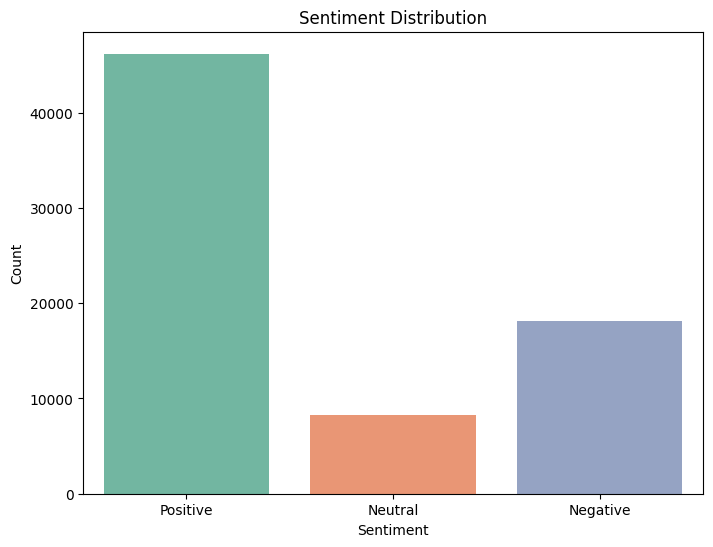

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

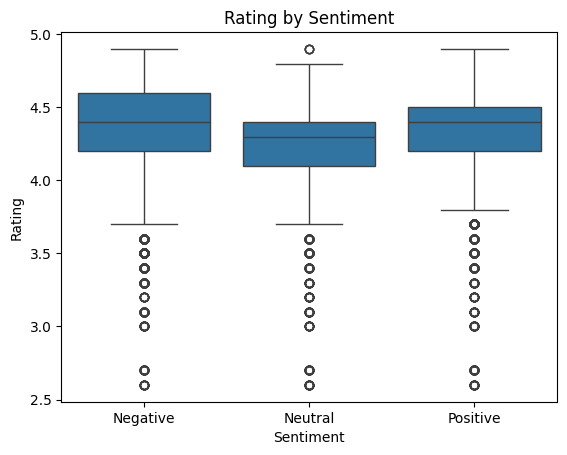

In [20]:
# Rating vs Sentiment
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Rating by Sentiment")
plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])
plt.show()

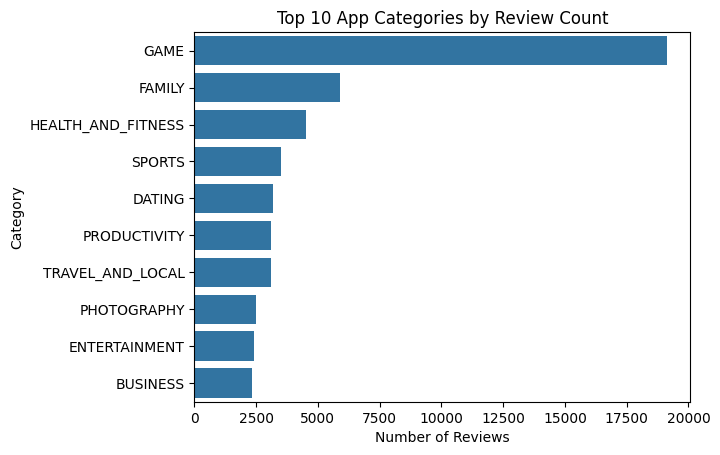

In [21]:
#review count by category
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 App Categories by Review Count")
plt.xlabel("Number of Reviews")
plt.show()

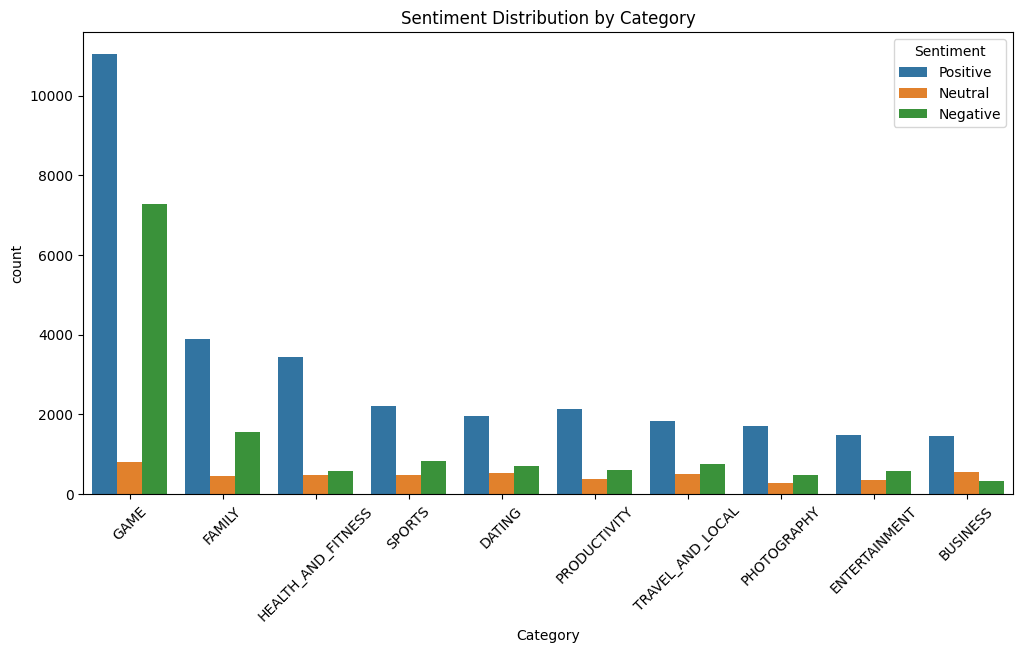

In [22]:
# Sentiment Distribution per Category

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='Sentiment', order=df['Category'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Category")
plt.show()


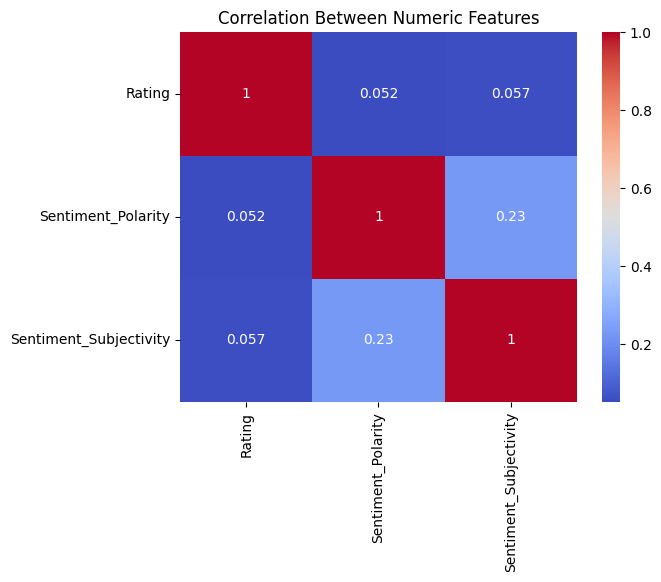

In [23]:
#correlation heatmap
sns.heatmap(df[['Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

In [24]:
df.drop_duplicates(subset=['Translated_Review'], inplace=True)
df.dropna(subset=['Sentiment', 'Translated_Review', 'Rating', 'Category'], inplace=True)

In [25]:
# Clean Rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [26]:
# Encode Sentiment
df['Sentiment'] = df['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

In [27]:
# Encode Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

In [28]:
df.describe()

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Size,Category_encoded
count,26682.000000,26682.000000,26682.000000,26682.000000,18115.000000,26682.000000
mean,1.406529,0.170110,0.485183,4.290421,28.399090,16.838318
std,0.830335,0.343588,0.259324,0.312855,25.990158,8.226176
min,0.000000,-1.000000,0.000000,2.600000,0.008301,0.000000
25%,1.000000,0.000000,0.350000,4.100000,8.400000,11.000000
50%,2.000000,0.141667,0.504488,4.300000,19.000000,15.000000
75%,2.000000,0.400000,0.650000,4.500000,44.000000,24.000000
max,2.000000,1.000000,1.000000,4.900000,99.000000,32.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack



X = df[['Translated_Review', 'Rating', 'Category_encoded']]
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(stop_words='english', max_features=300)
X_train_text = tfidf.fit_transform(X_train['Translated_Review'])
X_test_text = tfidf.transform(X_test['Translated_Review'])



In [30]:
X_train_num = X_train[['Rating', 'Category_encoded']].reset_index(drop=True)
X_test_num = X_test[['Rating', 'Category_encoded']].reset_index(drop=True)

# Final feature matrix
X_train_final = hstack([X_train_text, X_train_num])
X_test_final = hstack([X_test_text, X_test_num])

In [31]:
#  Train the Random Forest Model

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Evaluate the Model

y_pred = rf.predict(X_test_final)

print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Confusion Matrix:
 [[ 658  128  410]
 [  56  545  174]
 [ 155  199 3012]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.55      0.64      1196
           1       0.62      0.70      0.66       775
           2       0.84      0.89      0.87      3366

    accuracy                           0.79      5337
   macro avg       0.74      0.72      0.72      5337
weighted avg       0.79      0.79      0.78      5337



# Xgboost Classifier

In [33]:
from xgboost import XGBClassifier

# Train-test split

X = df[['Translated_Review', 'Rating', 'Category_encoded']]
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=300)
X_train_text = tfidf.fit_transform(X_train['Translated_Review'])
X_test_text = tfidf.transform(X_test['Translated_Review'])

In [35]:
# Combine with numeric features
X_train_num = X_train[['Rating', 'Category_encoded']].reset_index(drop=True)
X_test_num = X_test[['Rating', 'Category_encoded']].reset_index(drop=True)

In [36]:
X_train_final = hstack([X_train_text, X_train_num])
X_test_final = hstack([X_test_text, X_test_num])

In [37]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [40]:
# Evaluate
y_pred = xgb.predict(X_test_final)
print("\n [XGBoost] Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n [XGBoost] Classification Report:\n", classification_report(y_test, y_pred))


 [XGBoost] Confusion Matrix:
 [[ 681  165  350]
 [  21  645  109]
 [ 162  259 2945]]

 [XGBoost] Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.66      1196
           1       0.60      0.83      0.70       775
           2       0.87      0.87      0.87      3366

    accuracy                           0.80      5337
   macro avg       0.75      0.76      0.74      5337
weighted avg       0.81      0.80      0.80      5337



# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression


# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_final, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [43]:
# Evaluate
y_pred = lr.predict(X_test_final)
print("\n [Logistic Regression] Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n [Logistic Regression] Classification Report:\n", classification_report(y_test, y_pred))


 [Logistic Regression] Confusion Matrix:
 [[ 711  134  351]
 [  45  561  169]
 [ 160  188 3018]]

 [Logistic Regression] Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67      1196
           1       0.64      0.72      0.68       775
           2       0.85      0.90      0.87      3366

    accuracy                           0.80      5337
   macro avg       0.75      0.74      0.74      5337
weighted avg       0.80      0.80      0.80      5337

